# Introduction/ Welcome word.

Hi! Thank you for the correction/ review!

My name is Tauras Aleksandravicius and this is my  **Data Science Module 3 Sprint 3 project.**

In this project I focused on **supervised Machine learning fundamentals.**

For this purpose I worked with a Spaceship Titanic dataset, which was used in various ML competitions. [Link to the Dataset](https://www.kaggle.com/competitions/spaceship-titanic)

<span style="font-size: larger;">**Project Problem:**</span>

I am employed as a Data Scientist at a Spaceship Titanic analysis center. Aim of the project is to classify passengers into being Transported or not.

<span style="font-size: larger;">**Proposed Solution:**</span>

Our approach involves leveraging Exploratory Data Analysis (EDA) and Machine Learning techniques to perform an in-depth analysis of historical spaceship titanic data. This also involves advanced feature engineering techniques, feature selection, model selection, hyperparameter tuning and submission of results.

# Project approach/ objectives.

My approach to this project follows a structured, step-by-step methodology grounded in
data science best practices. Each stage is thoughtfully designed to build upon the previous,
ensuring a cohesive and comprehensive solution:

1. **Data Preprocessing.**  After understanding the dataset, we clean and preprocess the data.


2. **Exploratory Data Analysis.** This step involves thorough understanding of the dataset, variables and structure. With selected features (based on domain knowledge and their interrelationships) this stage covers unearthing patterns, spotting anomalies, checking assumptions through visual and quantitative methods. It provides an in-depth understanding of the variables and their interrelationships.

3. **Machine Learning.** Main objective and most important part of this project. At third sprint its essential to perform good quality feature engineering and achieve best model performance.

# Data Preprocessing.

## Data Collection.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from ydata_profiling import ProfileReport
from statsmodels.stats.proportion import proportions_ztest
import tools
import scipy.stats as stats

pd.set_option('display.max_columns', None)
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
file_path = '/Users/taurasaleksandravicius/Desktop/Personal/TC/Projects/taleks-ML.3.5-1/'
df = pd.read_csv(f"{file_path}train.csv")

In [3]:
df.shape

(8693, 14)

In [4]:
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

## Data Preprocessing.

**Desciption of the features:**
* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column we are trying to predict.

Now let's check some descriptive statistics about features.

In [5]:
tools.summary(df)

Dataframe shape: (8693, 14)


Data Type  # Unique  Missing  Missing %  Min      Max  \
PassengerId     object      8693        0        0.0  NaN      NaN   
HomePlanet      object         3      201        2.3  NaN      NaN   
CryoSleep       object         2      217        2.5  NaN      NaN   
Cabin           object      6560      199        2.3  NaN      NaN   
Destination     object         3      182        2.1  NaN      NaN   
Age            float64        80      179        2.1  0.0     79.0   
VIP             object         2      203        2.3  NaN      NaN   
RoomService    float64      1273      181        2.1  0.0  14327.0   
FoodCourt      float64      1507      183        2.1  0.0  29813.0   
ShoppingMall   float64      1115      208        2.4  0.0  23492.0   
Spa            float64      1327      183        2.1  0.0  22408.0   
VRDeck         float64      1306      188        2.2  0.0  24133.0   
Name            object      8473      200        2.3  NaN      NaN   
Transported       bool         2        0        0.0  NaN      NaN   

                    Mean Standard Deviation  
PassengerId          NaN                NaN  
HomePlanet           NaN                NaN  
CryoSleep            NaN                NaN  
Cabin                NaN                NaN  
Destination          NaN                NaN  
Age             28.82793          14.489021  
VIP                  NaN                NaN  
RoomService   224.687617         666.717663  
FoodCourt     458.077203         1611.48924  
ShoppingMall  173.729169         604.696458  
Spa           311.138778        1136.705535  
VRDeck        304.854791        1145.717189  
Name                 NaN                NaN  
Transported          NaN                NaN

**Initial thoughts:**
* Many null values;
* few cardinal features;
* scales of numeric features are different;

### Let's proceed with EDA

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

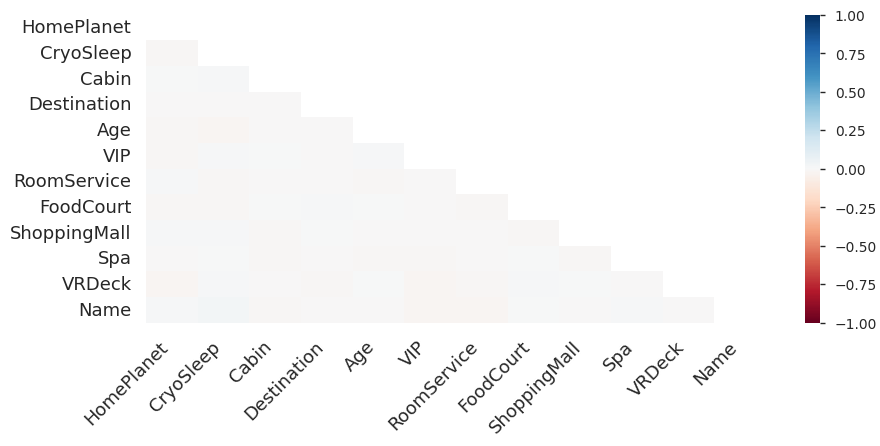

In [6]:
profile = ProfileReport(df, title="Profiling Report", explorative=True)

profile

**Insights on the dataset:**
* 2% missing rows, no duplicated rows.
* PassengerId - just id, will probably set as an index.
* Homeplanet - 3 classes, majority is Earth, couple of missing values (maybe will use KNN for this or drop them)
* CryoSleep - Boolean, also some missing values.
* Cabin - probably will need to split and take a look more closely; Very high cardinality.
* Destination - very imbalanced, 3 classes.
* Age - despite missing seems pretty clean;
* VIP - very low variance, boolean. Probably will be useless.
* Room Service - through VR Deck - all ok.
* Name - most likely useless.

In [7]:
df.isna().sum(axis=1).value_counts().sort_index()

0    6606
1    1867
2     203
3      17
Name: count, dtype: int64

There are 17 rows that have maximum - 3 missing values. Seems that missing data is not systematic.

## Initial Mutual Info

Let's maintain integrity of the whole dataset, let's take a look at whats the mutual information provided by features against target. Let's impute all missing values with mode or median.

In [8]:
df_eda = df.copy()

In [9]:
categorical_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']
for col in categorical_cols:
    df_eda[col].fillna(df_eda[col].mode()[0], inplace=True)

numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in numerical_cols:
    df_eda[col].fillna(df_eda[col].median(), inplace=True)


In [10]:
X_train, y_train, X_val, y_val, X_test, y_test = tools.stratified_train_val_test_split(df_eda, target_col='Transported')

In [11]:
from sklearn.feature_selection import mutual_info_classif

if y_train.dtype == 'object':
    y_train, _ = y_train.factorize()
    
for colname in X_train.select_dtypes("object"):
    X_train[colname], _ = X_train[colname].factorize()

mi_scores = mutual_info_classif(X_train, y_train, random_state=42)
mi_scores_series = pd.Series(mi_scores, name="MI Scores", index=X_train.columns)

mi_scores_series.sort_values(ascending=False)

CryoSleep       0.112037
Spa             0.077659
RoomService     0.065741
VRDeck          0.058921
ShoppingMall    0.052388
FoodCourt       0.045094
HomePlanet      0.017397
Destination     0.014382
Cabin           0.011023
Age             0.004206
Name            0.003300
PassengerId     0.001920
VIP             0.000000
Name: MI Scores, dtype: float64

Ok as expected VIP seems to have to relationship to target and some features like CryoSleep and expenses on goods look as good predictors.


### Correlation between features

In [12]:
df_corr = df_eda.copy()
df_corr.drop(['PassengerId', 'Cabin', 'Name', 'VIP'], axis=1, inplace=True)

numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'Transported']

for col in numerical_cols:
    df_corr[col].fillna(df_corr[col].median(), inplace=True)

for col in categorical_cols:
    df_corr[col].fillna(df_corr[col].mode()[0], inplace=True)

for col in categorical_cols:
    df_corr[col], _ = pd.factorize(df_corr[col])

In [13]:
pearson_corr = df_corr[numerical_cols].corr(method='pearson')
pearson_corr

Age  RoomService  FoodCourt  ShoppingMall       Spa  \
Age           1.000000     0.068629   0.127390      0.033148  0.120946   
RoomService   0.068629     1.000000  -0.015126      0.052337  0.009244   
FoodCourt     0.127390    -0.015126   1.000000     -0.013717  0.221468   
ShoppingMall  0.033148     0.052337  -0.013717      1.000000  0.014542   
Spa           0.120946     0.009244   0.221468      0.014542  1.000000   
VRDeck        0.099590    -0.018624   0.224572     -0.007849  0.147658   

                VRDeck  
Age           0.099590  
RoomService  -0.018624  
FoodCourt     0.224572  
ShoppingMall -0.007849  
Spa           0.147658  
VRDeck        1.000000

In [14]:
spearman_corr = df_corr[categorical_cols].corr(method='spearman') 
spearman_corr

HomePlanet  CryoSleep  Destination  Transported
HomePlanet     1.000000  -0.042624    -0.231268    -0.105530
CryoSleep     -0.042624   1.000000     0.105824     0.460132
Destination   -0.231268   0.105824     1.000000     0.103728
Transported   -0.105530   0.460132     0.103728     1.000000

**Insights:**
* Seems that older passengers are tend to expend a bit more on SPA, Food Court;
* Other numerical correlations low.
* Seems that people from diffent planets tend to choose different destinations.
* Some planets tend to me less transported than others.
* People under CryoSleep seems to be a lot more likely to be exported.
* Some certain destinations seem to have trends to be more transported than others.
  
**Lets analyze deeper with EDA**

### EDA on current features.

In [15]:
df_eda['Transported'] = df_eda['Transported'].astype('category')

In [16]:
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

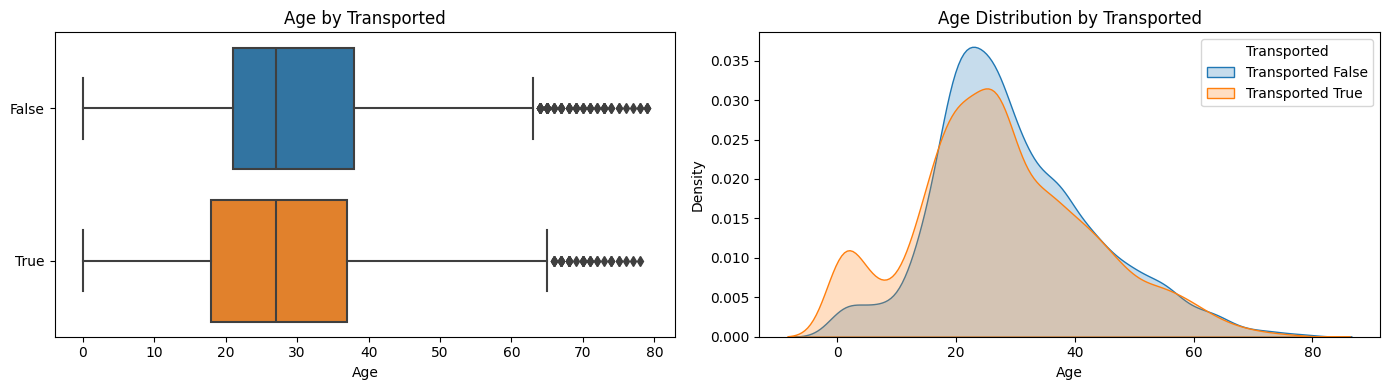

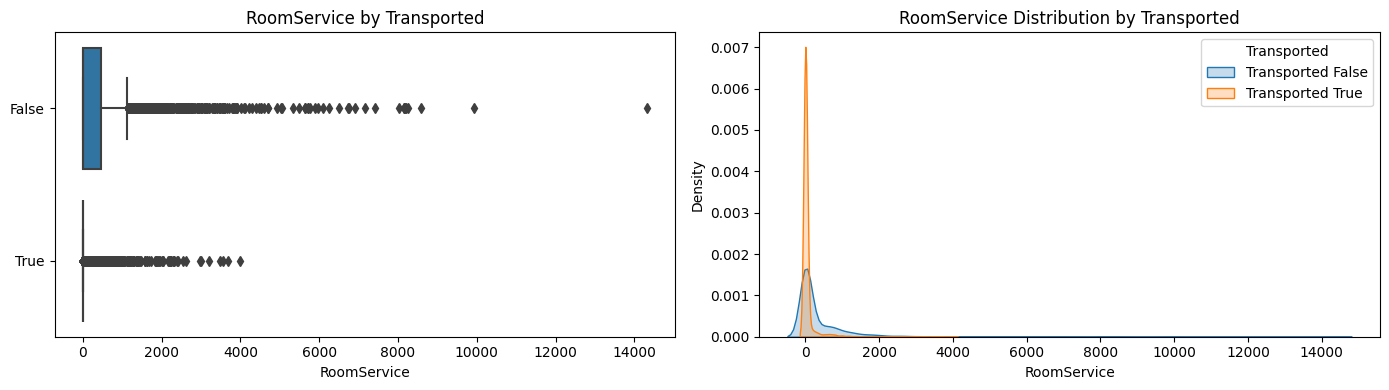

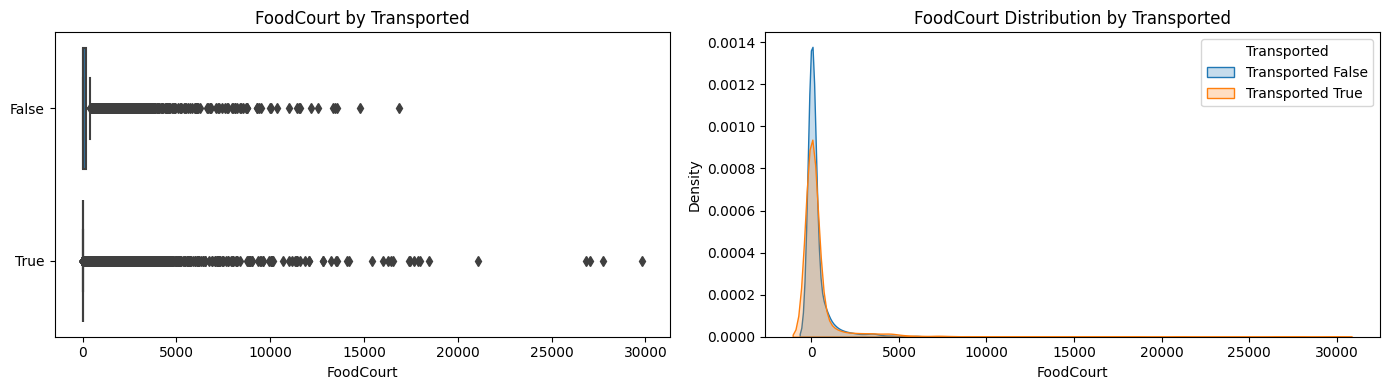

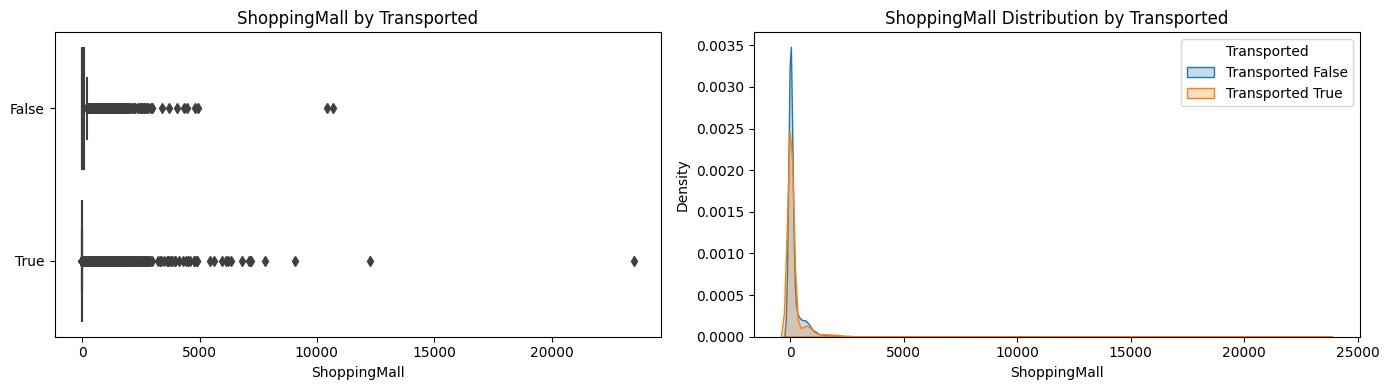

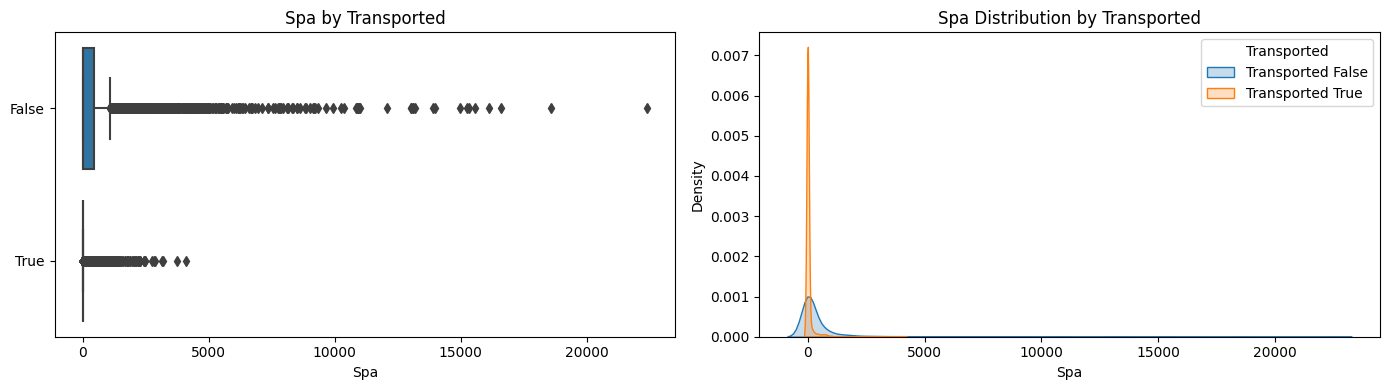

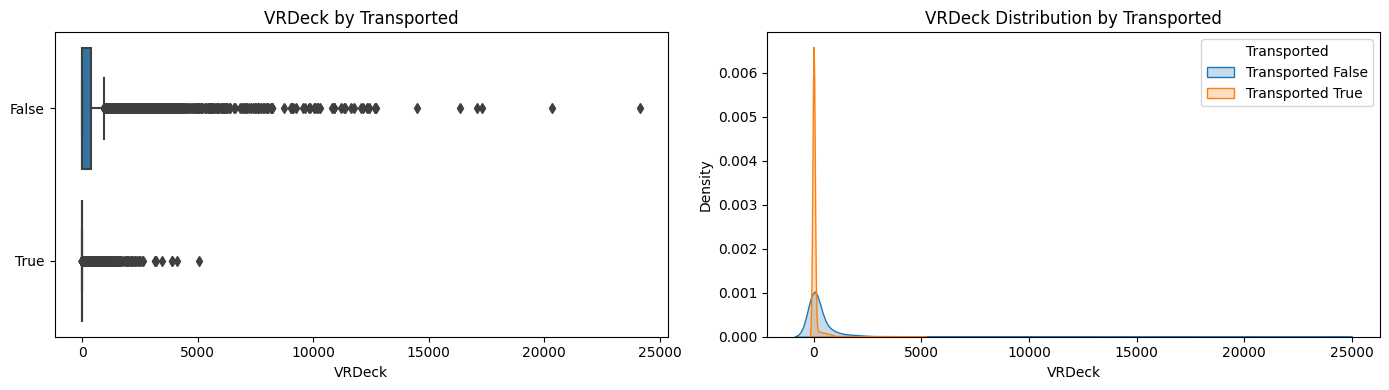

In [17]:
for col in numerical_cols:
    tools.plot_eda(df_eda, col, col, continuous=True)

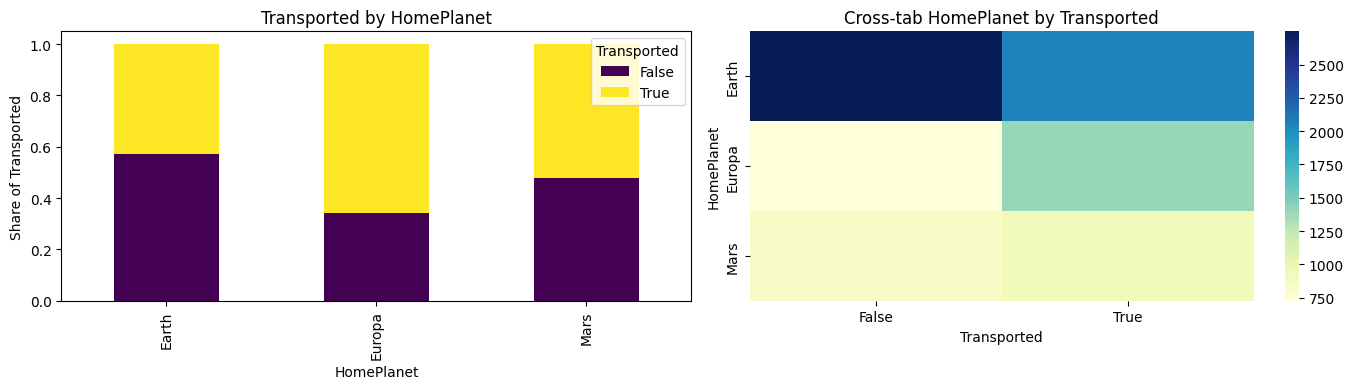

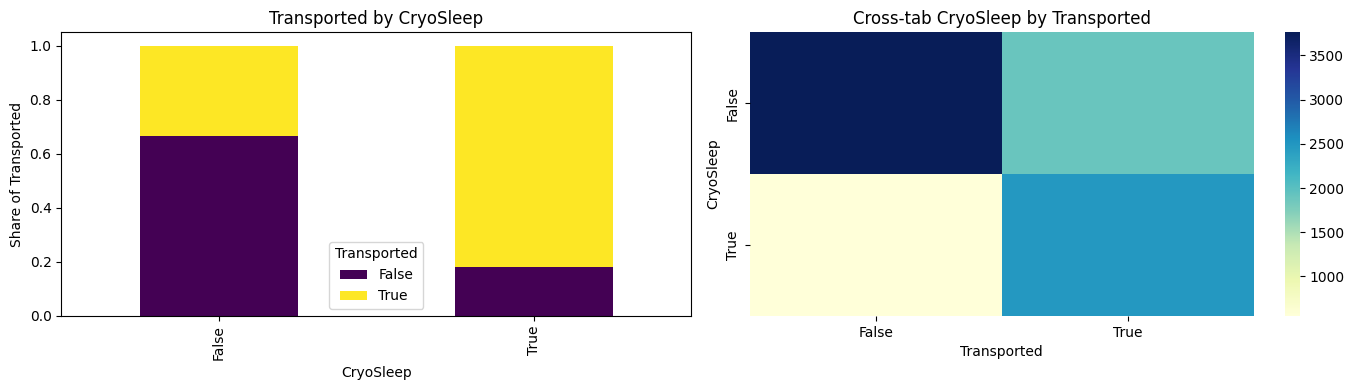

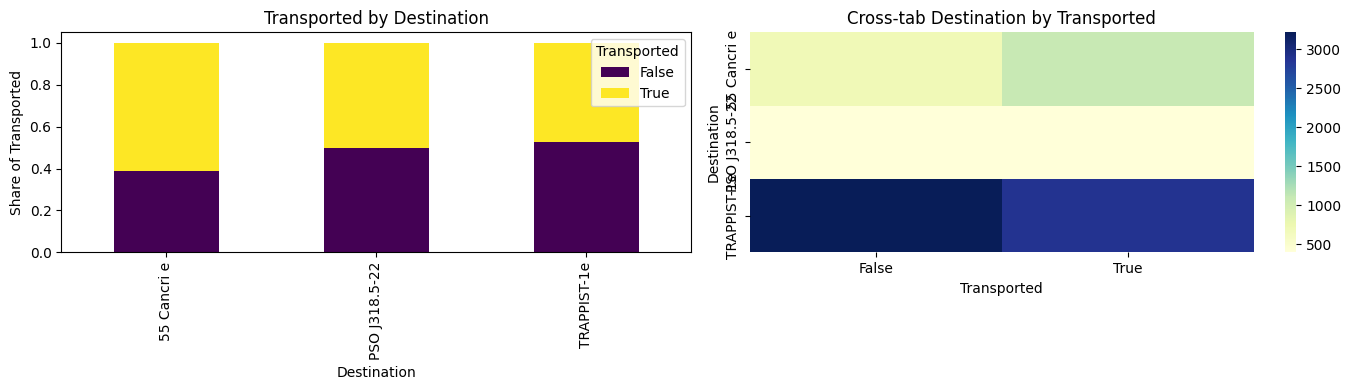

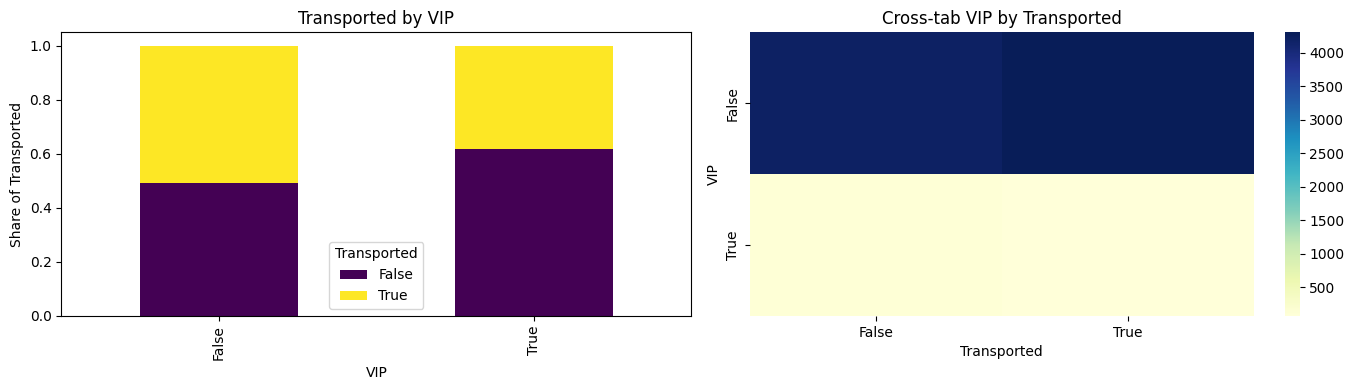

In [18]:
for col in categorical_cols:
    tools.plot_eda(df_eda, col, col, continuous=False)

**Insights:**
- Age: Most passengers between 18-32; 0-18 people were comparitively mostly transported age group. 18-40 there were more not transported rather than transported. It makes sense to create **categories from age.**
- Spend related features: All very right skewed, people tend to spend a lot less.; Let's make a feature **spend_zero: True/ False**. ; Let's try to make normal distribution with **log_transformation**. We can sum these and create feature **total_spend**.
- HomePlanet - Europeans are comparitively more transported than others. Also there are more Europeans than Marsians. We can create new feature: **is_european: True/ False.**
- Cryosleep - ones that asleep were a comparitively more transported than ones that weren't.
- Destination - most passengers went to Trappist, but 55 Cancri were more transported. Maybe it will be related to passengers seat or sth.
- VIP - As said before - almost no variance. It will be dropped.


### Nominal features with high cardinality

In [19]:
df_eda[['PassengerId', 'Cabin', 'Name']].head()

PassengerId  Cabin               Name
0     0001_01  B/0/P    Maham Ofracculy
1     0002_01  F/0/S       Juanna Vines
2     0003_01  A/0/S      Altark Susent
3     0003_02  A/0/S       Solam Susent
4     0004_01  F/1/S  Willy Santantines

**Remember how they are made:**

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Name - will be dropped, probably useless.

In [20]:
def split_passenger_id(df):
    df["Group"] = df["PassengerId"].apply(lambda x: x.split("_")[0])
    df["Member"] =df["PassengerId"].apply(lambda x: x.split("_")[1])
    return df

In [21]:
df_eda["Group"] = df_eda["PassengerId"].apply(lambda x: x.split("_")[0])
df_eda["Member"] =df_eda["PassengerId"].apply(lambda x: x.split("_")[1])
member_counts = df_eda.groupby("Group")["Member"].count().sort_values()
groups_with_members = set(member_counts[member_counts > 1].index)
df_eda["travel_alone"] = df_eda["Group"].apply(lambda group: group not in groups_with_members)

In [22]:
split_passenger_id(df_eda).head()

PassengerId HomePlanet  CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa      False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth      False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa      False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa      False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth      False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

  Transported Group Member  travel_alone  
0       False  0001     01          True  
1        True  0002     01          True  
2       False  0003     01         False  
3       False  0003     02         False  
4        True  0004     01          True

In [23]:
df_eda[['Group', 'Member']].describe()

Group Member
count   8693   8693
unique  6217      8
top     4498     01
freq       8   6217

In [24]:
df_eda.groupby("Group")["Member"].count().sort_values(ascending=False)

Group
4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: Member, Length: 6217, dtype: int64

In [25]:
member_counts = df_eda.groupby("Group")["Member"].count().sort_values()

groups_with_members = set(member_counts[member_counts > 1].index)

df_eda["travel_alone"] = df_eda["Group"].apply(lambda group: group not in groups_with_members)

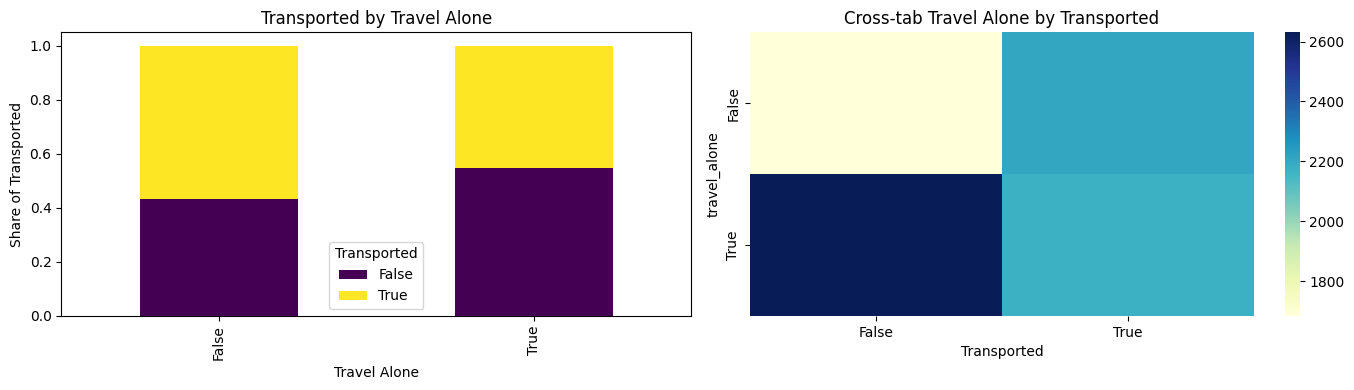

In [26]:
tools.plot_eda(df_eda, 'travel_alone', "Travel Alone", continuous=False)

**Insights:**
- Mostly people travel alone;
- It seems that the ones that did not travel alone were more likely to be transported. --> Interesting insight. It would be nice to check statistical significance.

### Statistical inference #1

* Population: all spaceship titanic passengers.
* Null: there is no difference in chances of being transported if travelling solo or in a group.
* Alternative: there is difference in travelling solo or in a group and chances of being transported.

In [27]:
contingency_table_states = pd.crosstab(df_eda['travel_alone'], df_eda['Transported'])

chi, pval, _, _ = stats.chi2_contingency(contingency_table_states.values)

print(f"chi2 statistic: {chi:.2f}")
print(f"p-value: {pval:.3f}")

chi2 statistic: 112.10
p-value: 0.000


**Since p value is < 0.05 we can reject null hypothesis and confirm that there is significant difference in chance being transported travelling in a group vs solo.**

**Let's proceed with a cabin.**

In [28]:
def cabin_split(df):
    # df["Cabin"].fillna("np.nan/np.nan/np.nan",inplace=True)
    df["cabin_deck"] = df["Cabin"].apply(lambda x: x.split("/")[0])
    df["cabin_nr"]  = df["Cabin"].apply(lambda x: x.split("/")[1])
    df["cabin_side"] = df["Cabin"].apply(lambda x: x.split("/")[2])
    return df

In [29]:
cabin_split(df_eda).head()

PassengerId HomePlanet  CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa      False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth      False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa      False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa      False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth      False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

  Transported Group Member  travel_alone cabin_deck cabin_nr cabin_side  
0       False  0001     01          True          B        0          P  
1        True  0002     01          True          F        0          S  
2       False  0003     01         False          A        0          S  
3       False  0003     02         False          A        0          S  
4        True  0004     01          True          F        1          S

In [30]:
cabin_features = ['cabin_deck', 'cabin_nr', 'cabin_side']
df_eda[cabin_features].describe()

cabin_deck cabin_nr cabin_side
count        8693     8693       8693
unique          8     1817          2
top             F      734          S
freq         2794      208       4487

Seems that number will be useless because of high cardinality. Lets investigate side and deck against target.

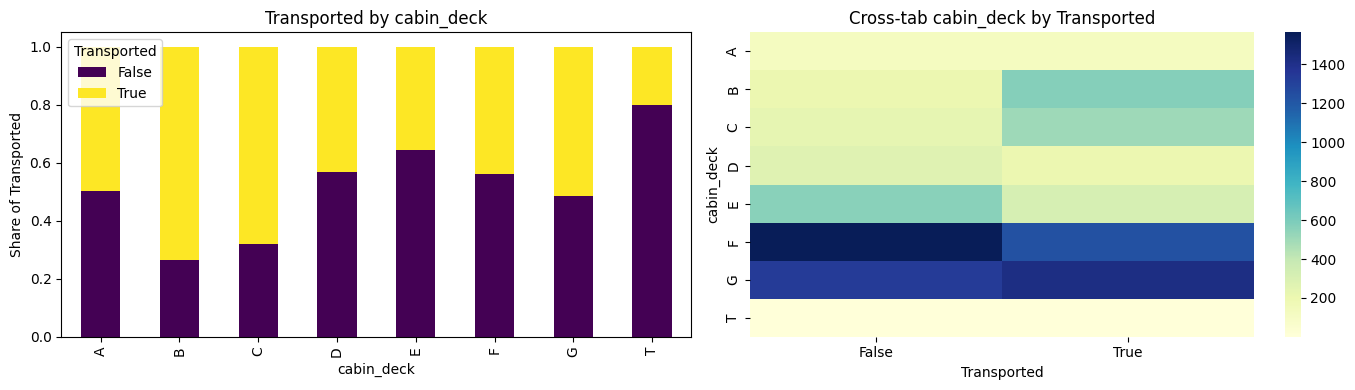

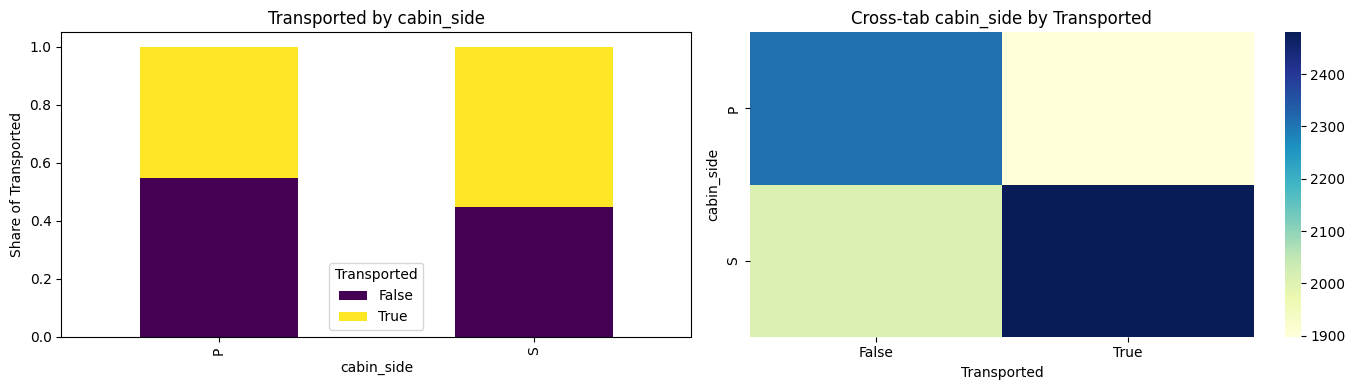

In [31]:
cabin_features = ['cabin_deck', 'cabin_side']
for col in cabin_features:
    tools.plot_eda(df_eda, col, col, continuous=False)

**Insights:**
- Ppl from B and C decks are more likely to be transported.
- Most of the passengers are from deck G, F.
- Ppl from S side seem to be more likely to be transported than P side.

### Statistical Inference #2

* Population: all spaceship titanic passengers.
* Null: there is no difference in chances of being transported based on cabin_side.
* Alternative: there is difference in cabin_side and chances being transported.

In [32]:
contingency_table_states = pd.crosstab(df_eda['cabin_side'], df_eda['Transported'])

chi, pval, _, _ = stats.chi2_contingency(contingency_table_states.values)

print(f"chi2 statistic: {chi:.2f}")
print(f"p-value: {pval:.3f}")

chi2 statistic: 88.97
p-value: 0.000


**Again - we reject null and confirm that with 95% confidence we can say that there is significant difference in chances being transported based by cabin_side.**

**But first, data split:**

In [33]:
df1 = df.copy()

In [34]:
X_train, y_train, X_val, y_val, X_test, y_test = tools.stratified_train_val_test_split(df, target_col='Transported')

## Baseline Model.

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import FunctionTransformer

def drop_features(df):
    return df.drop(columns=['PassengerId', 'Cabin', 'Name', 'VIP'])

drop_features_tf = FunctionTransformer(drop_features, validate=False)

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

binary_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']),
        ('cat', categorical_pipeline, ['HomePlanet', 'Destination']),
        ('bin', binary_pipeline, ['CryoSleep'])
    ]
)

xgb_pipeline = Pipeline([
    ('drop_features', drop_features_tf),
    ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(
        use_label_encoder=False, 
        eval_metric='logloss',
        max_depth=6,            
        min_child_weight=1,     
        subsample=0.8,          
        colsample_bytree=0.8,  
        learning_rate=0.1,    
        n_estimators=100,      
        objective='binary:logistic'
    ))])



xgb_pipeline.fit(X_train, y_train)

predictions = xgb_pipeline.predict(X_val)

f1 = f1_score(y_val, predictions, average='binary')

print("F1 Score:", f1)

F1 Score: 0.7944055944055943


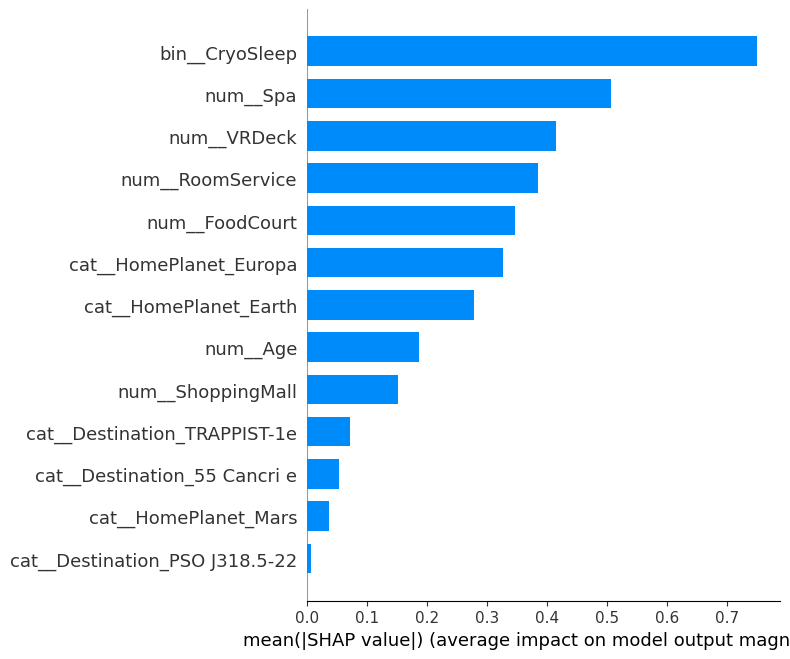

In [36]:
import shap
X_transformed = xgb_pipeline.named_steps['preprocessor'].transform(X_train)

feature_names = xgb_pipeline.named_steps['preprocessor'].get_feature_names_out()

explainer = shap.TreeExplainer(xgb_pipeline.named_steps['classifier'])

shap_values = explainer.shap_values(X_transformed)

shap.summary_plot(shap_values, X_transformed, feature_names=feature_names, plot_type="bar")

**OK. Seems model is already pretty good and some feature engineering and hyperparameter tuning can help to unearth some of the patterns, since we saw from EDA that there are indeed some!**

## Feature Engineering.

Okay my approach is to do feature engineering, measure mutual information and if succesful - encapsulate methods into functions and later reuse them in pipelines. So far plan is the following:
- Bin categories by age;
- 0-18, 18-40, 40-max;
- Spend_zero TF, log_transform features, total_spend
- is_european;
- travel_alone;
- cabin_deck;
- cabin_side;
- Drop - PassengerId, Cabin, Name, VIP.

In [37]:
def feature_engineering(df):
    
    df['age_bin'] = pd.qcut(df['Age'], q=4)
    df['total_spend'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa']
    df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa']]= df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa']].apply(lambda x: np.log1p(x))
    df['is_european'] = df['HomePlanet'].apply(lambda x: x== 'Europa')

    # Travel Alone Block
    df["Group"] = df["PassengerId"].apply(lambda x: x.split("_")[0])
    df["Member"] =df["PassengerId"].apply(lambda x: x.split("_")[1])
    member_counts = df.groupby("Group")["Member"].count().sort_values()
    groups_with_members = set(member_counts[member_counts > 1].index)
    df["travel_alone"] = df["Group"].apply(lambda group: group not in groups_with_members)

    # Cabin Block
    df["cabin_deck"] = df["Cabin"].apply(lambda x: x.split("/")[0] if isinstance(x, str) else x)
    df["cabin_side"] = df["Cabin"].apply(lambda x: x.split("/")[2] if isinstance(x, str) else x)

    #Drop unnecesary and intermediate products
    df.drop(columns=['PassengerId', 'Cabin', 'Name', 'VIP', 'Group', 'Member'], inplace=True)

    return df

feature_engineer = FunctionTransformer(feature_engineering)

In [38]:
X_train_copy = X_train.copy()

feature_engineering(X_train_copy).head()

HomePlanet CryoSleep    Destination   Age  RoomService  FoodCourt  \
7326      Earth     False  PSO J318.5-22  18.0     5.796058   0.000000   
1022      Earth     False    TRAPPIST-1e   7.0     0.000000   0.000000   
4481      Earth      True    TRAPPIST-1e  22.0     0.000000   0.000000   
6842      Earth      True    TRAPPIST-1e  34.0     0.000000   0.000000   
7675      Earth     False    TRAPPIST-1e  18.0     6.291569   1.098612   

      ShoppingMall       Spa  VRDeck         age_bin  total_spend  \
7326      0.000000  3.218876   309.0  (-0.001, 20.0]        352.0   
1022      0.000000  0.000000     0.0  (-0.001, 20.0]          0.0   
4481      0.000000  0.000000     0.0    (20.0, 27.0]          0.0   
6842      0.000000  0.000000     0.0    (27.0, 37.0]          0.0   
7675      1.386294  6.803505     0.0  (-0.001, 20.0]       1444.0   

      is_european  travel_alone cabin_deck cabin_side  
7326        False          True          F          S  
1022        False         False          G          P  
4481        False          True          G          S  
6842        False          True          G          S  
7675        False          True          F          S

###  Mutual Information on New Features.

In [39]:
categorical_cols = ['is_european', 'travel_alone', 'cabin_side', 'cabin_deck', 'age_bin']
numerical_cols = ['total_spend']

columns_to_use = categorical_cols + numerical_cols
X_train_copy = X_train_copy[columns_to_use]

X_train_copy['age_bin'] = X_train_copy['age_bin'].astype(str)
X_train_copy['age_bin'], _ = pd.factorize(X_train_copy['age_bin'])

for colname in X_train_copy.select_dtypes("object"):
    X_train_copy[colname], _ = pd.factorize(X_train_copy[colname])

for col in categorical_cols:
    X_train_copy[col].fillna(X_train_copy[col].mode()[0], inplace=True)

for col in numerical_cols:
    X_train_copy[col].fillna(X_train_copy[col].median(), inplace=True)

if y_train.dtype == 'object':
    y_train, _ = y_train.factorize()

mi_scores = mutual_info_classif(X_train_copy, y_train, random_state=42, discrete_features='auto')
mi_scores_series = pd.Series(mi_scores, index=X_train_copy.columns)

print(mi_scores_series.sort_values(ascending=False))


total_spend     0.099333
cabin_deck      0.019664
age_bin         0.009290
travel_alone    0.004228
is_european     0.004052
cabin_side      0.002984
dtype: float64


**Ok. Seems that total_spend and cabin deck can be useful features. Others seem to be weak predictors.**

**Since we deal with artificial dataset, and we want to maximize score in the Kaggle competition I will keep all predictors above 0. For this instance we've only dropped VIP feature.**

## Model Creation.

In [40]:
tools.isna(X_train)

PassengerId     0.000000
HomePlanet      2.403945
CryoSleep       2.568317
Cabin           2.362852
Destination     2.260119
Age             2.013561
VIP             2.445038
RoomService     1.993014
FoodCourt       2.219026
ShoppingMall    2.506678
Spa             2.136840
VRDeck          2.095747
Name            2.239573
dtype: float64


**We will still need to impute these missing values. For categorical features we will use Mode, and for numeric - median value.**

In [41]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

binary_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'total_spend']),
        ('cat', categorical_pipeline, ['HomePlanet', 'Destination', 'cabin_deck', 'cabin_side', 'age_bin']),
        ('bin', binary_pipeline, ['CryoSleep', 'is_european', 'travel_alone'])
    ]
)

xgb_pipeline = Pipeline([
    ('feature_engineering', feature_engineer),
    ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(
        use_label_encoder=False, 
        eval_metric='logloss',
        max_depth=6,            
        min_child_weight=1,     
        subsample=0.8,          
        colsample_bytree=0.8,  
        learning_rate=0.1,    
        n_estimators=100,      
        objective='binary:logistic'
    ))
])

def cv_model(model, X, y, cv=3):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    f1_scores = []

    for train_index, val_index in kf.split(X):
        X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
        y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

        model.fit(X_train_fold, y_train_fold)
        predictions = model.predict(X_val_fold)

        f1 = f1_score(y_val_fold, predictions, average='binary')
        f1_scores.append(f1)

    return f1_scores

xgb_cv_scores = cv_model(xgb_pipeline, X_train, y_train)

xgb_cv_scores


[0.78735275883447, 0.8038277511961722, 0.8108761329305135]

Ok. Model is not overfitting. Lets evaluate first shot at the evaluation dataset using classification report and confusion matrix.

In [42]:
X_train_copy = X_train.copy()
X_val_copy = X_val.copy()

xgb_pipeline.fit(X_train_copy, y_train)
y_pred = xgb_pipeline.predict(X_val_copy)


print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[814 222]
 [201 850]]
              precision    recall  f1-score   support

       False       0.80      0.79      0.79      1036
        True       0.79      0.81      0.80      1051

    accuracy                           0.80      2087
   macro avg       0.80      0.80      0.80      2087
weighted avg       0.80      0.80      0.80      2087



**Pretty good. Let's go ahead with SHAP values.**

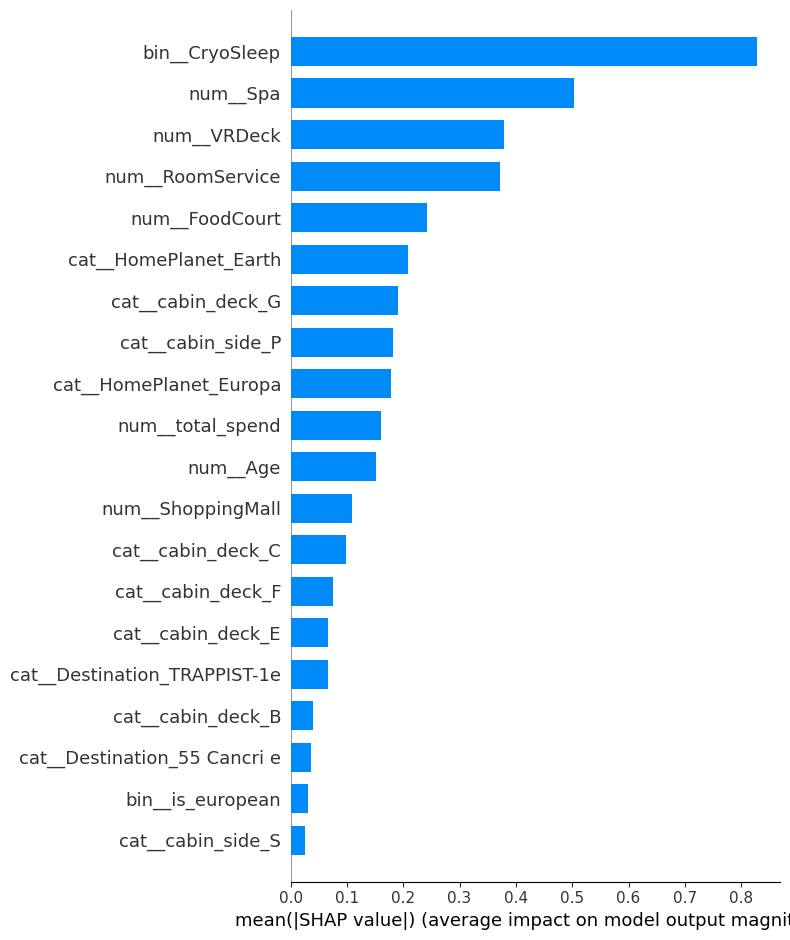

In [43]:
X_transformed = xgb_pipeline.named_steps['preprocessor'].transform(X_train_copy)

feature_names = xgb_pipeline.named_steps['preprocessor'].get_feature_names_out()

explainer = shap.TreeExplainer(xgb_pipeline.named_steps['classifier'])

shap_values = explainer.shap_values(X_transformed)

shap.summary_plot(shap_values, X_transformed, feature_names=feature_names, plot_type="bar")


**Nice! Seems that model improved even more! Cabin Deck and Total Spend features seem like nice predictors!**

Let's proceed with hyperparameter tuning.

### Hyperparameter Tuning

In [44]:
import optuna

optuna.logging.set_verbosity(optuna.logging.WARNING)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'total_spend']),
        ('cat', categorical_pipeline, ['HomePlanet', 'Destination', 'cabin_deck', 'cabin_side', 'age_bin']),
        ('bin', binary_pipeline, ['CryoSleep', 'is_european', 'travel_alone'])
    ],
    verbose_feature_names_out=False
)
X_train_tf = X_train.copy()
X_val_tf = X_val.copy()

feature_engineering(X_train_tf)
feature_engineering(X_val_tf)

X_train_tf = preprocessor.fit_transform(X_train_tf)
X_val_tf = preprocessor.transform(X_val_tf)

def objective(trial):
    xgb_params = {
        'max_depth': trial.suggest_int("max_depth", 2, 6),
        'learning_rate': trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True),
        'gamma': trial.suggest_float("gamma", 1e-4, 1, log=True),
        'min_child_weight': trial.suggest_int("min_child_weight", 1, 10),
        'reg_alpha': trial.suggest_float("reg_alpha", 1e-4, 1e2, log=True),
        'reg_lambda': trial.suggest_float("reg_lambda", 1e-4, 1e2, log=True),
        'subsample': trial.suggest_float("subsample", 0.5, 1),
        'objective': "binary:logistic",
        'n_estimators': 500,
        'eval_metric': "logloss",
        'random_state': 0
    }
    model = XGBClassifier(**xgb_params)
    model.fit(X_train_tf, y_train, eval_set=[(X_val_tf, y_val)], verbose=0, early_stopping_rounds=10)
    return model.best_score

sampler = optuna.samplers.TPESampler(seed=0)
study = optuna.create_study(direction="minimize", sampler=sampler)
study.optimize(objective, n_trials=300, n_jobs=-1)
xgb_params = study.best_params
xgb_params


In [45]:
# max_depth=4, 
# learning_rate=0.08915023053104956, 
# gamma=0.0006768256792688764,
# min_child_weight=4, 
# reg_alpha=0.02439193544205168,  
# reg_lambda=0.004892750380808276, 
# subsample=0.9024282592394947,

In [46]:
X_train_copy = X_train.copy()
X_val_copy = X_val.copy()

xgb_pipeline = Pipeline([
    ('feature_engineering', feature_engineer),
    ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(
       use_label_encoder=False,
        eval_metric='logloss',
        max_depth=4, 
        learning_rate=0.08915023053104956, 
        gamma=0.0006768256792688764,
        min_child_weight=4, 
        reg_alpha=0.02439193544205168,  
        reg_lambda=0.004892750380808276, 
        subsample=0.9024282592394947,
        colsample_bytree=0.8,
        n_estimators=100, 
        objective='binary:logistic'
    ))
])

xgb_pipeline.fit(X_train_copy, y_train)
y_pred = xgb_pipeline.predict(X_val_copy)


print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[800 236]
 [179 872]]
              precision    recall  f1-score   support

       False       0.82      0.77      0.79      1036
        True       0.79      0.83      0.81      1051

    accuracy                           0.80      2087
   macro avg       0.80      0.80      0.80      2087
weighted avg       0.80      0.80      0.80      2087



In [47]:
# [[814 222]
#  [201 850]]
#               precision    recall  f1-score   support

#        False       0.80      0.79      0.79      1036
#         True       0.79      0.81      0.80      1051

#     accuracy                           0.80      2087
#    macro avg       0.80      0.80      0.80      2087
# weighted avg       0.80      0.80      0.80      2087

### Model Ensembling

Let's now proceed with model ensembles. Model ensembles are highly powerful because they combine the strengths of several machine learning algorithms. Through a process known as voting, they aggregate the predictions from multiple models to decide on the final label. This approach often leads to improved accuracy and robustness in predictions compared to using a single model.


**Train one model. Let's try some differend one - like Support Vector Classifier.**

In [53]:
from sklearn.svm import SVC

X_train_copy = X_train.copy()
X_val_copy = X_val.copy()

svc_pipeline = Pipeline([
    ('feature_engineering', feature_engineer),
    ('preprocessor', preprocessor),
    ('classifier', SVC()) 
])

svc_pipeline.fit(X_train_copy, y_train)
y_pred = svc_pipeline.predict(X_val_copy)

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))


[[787 249]
 [189 862]]
              precision    recall  f1-score   support

       False       0.81      0.76      0.78      1036
        True       0.78      0.82      0.80      1051

    accuracy                           0.79      2087
   macro avg       0.79      0.79      0.79      2087
weighted avg       0.79      0.79      0.79      2087



### Let's try Voting Classifier. 

In [ ]:
import VotingClassifier

X_train_copy = X_train.copy()
X_val_copy = X_val.copy()

ensemble = VotingClassifier(
    estimators=[
        ('svc', svc_pipeline),
        ('logreg', logistic_regression_pipeline)
    ],
    voting='soft',
    n_jobs=-1 
)

ensemble.fit(X_train_copy, y_train)

In [ ]:
y_pred = ensemble.predict(X_val_copy)

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

In [ ]:
# [[818 218]
#  [203 848]]
#               precision    recall  f1-score   support

#        False       0.81      0.79      0.80      1036
#         True       0.79      0.81      0.79      1051

#     accuracy                           0.80      2087
#    macro avg       0.80      0.80      0.80      2087
# weighted avg       0.80      0.80      0.80      2087

Seems that Voting Classifier did not perform better than XGB. We will use XGB for the predictions.

### Saving Model and Submitting result.

In [ ]:
X_test = pd.read_csv('test.csv')
X_test_copy = X_test.copy()

In [ ]:
predictions = xgb_pipeline.predict(X_test)

output = pd.DataFrame({'PassengerId': X_test_copy.PassengerId, 'Transported': predictions})
output = output.replace({0: False, 1: True})

output.to_csv('submission.csv', index=False)

# Conclusion

* Model achieved 80% f1 score - 4/5 people were correctly classificed as Transported.
* CryoSleep, Spend features were the most important predictors.
* Feature Engineering techniques tried and used in modelling. It improved model performance.
* The ones who did not travel alone were more likely to be transported.
* Ones who were on deck B, C and S side were more likely to be transported.
* Cross-Validation showed that model is not likely over/under fitting;
